In [1]:
from learningAgent import LearningAlgorithm
from environment import Model, AdversaryModes
from Qtable import QTable
from test import Test
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(0)

In [3]:
total_demand = 400
agent_cost = 57
adversary_cost = 71 
costs = [agent_cost,adversary_cost]
total_stages = 25
adversary_probabilities=[0]*len(AdversaryModes)
# Below is where we decide what adversaries we train against. See environment.py for the numbers
adversary_probabilities[3]= 0.5
adversary_probabilities[10] = 0.5
game = Model(total_demand, costs, total_stages, adversary_probabilities)

In [4]:
number_actions = 50
number_demands = total_demand + 1
discount_factor = 1
number_episodes = 100_000_000
constant = int(number_episodes/49)
print(constant)

2040816


In [5]:
# Learning rate is given as [numerator,denominator] which gives us a learning rate function of 
# numerator/(n+denominator)
Qtable = QTable(number_demands, number_actions, total_stages , learning_rate = [constant,constant])

In [6]:
algorithm = LearningAlgorithm(game, Qtable, number_episodes, discount_factor)

In [7]:
opponent_results = [list() for mode in AdversaryModes]

In [8]:
# Action are only chosen according to an epsilon greedy strategy.
episode_counter = 0
number_episodes_per_round = 500_000
number_rounds = int(number_episodes / number_episodes_per_round)

for round_ in range(number_rounds): 
    print('Round ', round_, ' of ', number_rounds)
    algorithm.epsilon_greedy_learning(number_episodes_per_round, episode_counter, number_episodes)

    for index, adversary in enumerate(AdversaryModes):
        if adversary_probabilities[index] > 0:
            new_adversary_probabilities =[0]*len(AdversaryModes)
            new_adversary_probabilities[index] = 1
            result = Test(game, Qtable, discount_factor, new_adversary_probabilities)
            payoff, _, _, _, _ = result.total_payoff()
            opponent_results[index].append(payoff)
            print('Current payoff against', adversary.name, ":" , payoff)
    
    episode_counter += number_episodes_per_round


Round  0  of  200
Best payoff:  131209
Best actions:  [123, 109, 103, 120, 118, 106, 118, 124, 126, 96, 114, 102, 129, 107, 122, 122, 110, 108, 123, 116, 121, 122, 107, 111, 129]
Current payoff against imitation_132 : 129237.0
Current payoff against guess_132 : 105869.0
Round  1  of  200
Best payoff:  119340
Best actions:  [118, 125, 119, 114, 124, 100, 117, 104, 128, 109, 122, 82, 118, 108, 111, 121, 104, 117, 85, 111, 121, 108, 106, 122, 79]
Current payoff against imitation_132 : 129771.0
Current payoff against guess_132 : 84732.0
Round  2  of  200
Best payoff:  120336
Best actions:  [119, 125, 121, 128, 130, 112, 120, 118, 122, 111, 126, 84, 127, 128, 126, 101, 120, 107, 124, 104, 119, 125, 124, 83, 113]
Current payoff against imitation_132 : 131184.0
Current payoff against guess_132 : 101847.0
Round  3  of  200
Best payoff:  121155
Best actions:  [120, 122, 119, 118, 120, 121, 116, 113, 111, 118, 112, 129, 83, 108, 122, 119, 78, 126, 99, 117, 108, 113, 116, 94, 106]
Current payoff 

Best payoff:  123927
Best actions:  [118, 122, 116, 114, 116, 121, 121, 104, 99, 116, 112, 111, 116, 111, 107, 110, 111, 115, 113, 124, 89, 98, 87, 111, 126]
Current payoff against imitation_132 : 129605.0
Current payoff against guess_132 : 111266.0
Round  32  of  200
Best payoff:  121323
Best actions:  [115, 131, 108, 124, 93, 124, 100, 113, 112, 117, 118, 102, 121, 110, 120, 113, 104, 119, 119, 125, 103, 111, 98, 109, 131]
Current payoff against imitation_132 : 131010.0
Current payoff against guess_132 : 123313.0
Round  33  of  200
Best payoff:  125523
Best actions:  [117, 132, 132, 129, 123, 121, 127, 120, 110, 127, 117, 111, 126, 102, 101, 131, 92, 107, 107, 119, 105, 95, 126, 115, 100]
Current payoff against imitation_132 : 129907.0
Current payoff against guess_132 : 113485.0
Round  34  of  200
Best payoff:  122937
Best actions:  [118, 127, 122, 129, 118, 127, 110, 107, 121, 112, 121, 124, 86, 109, 132, 110, 97, 104, 128, 120, 94, 118, 106, 103, 128]
Current payoff against imitati

Best payoff:  124061
Best actions:  [122, 128, 132, 130, 125, 123, 122, 119, 130, 125, 123, 100, 115, 119, 127, 104, 129, 110, 127, 120, 107, 93, 132, 80, 107]
Current payoff against imitation_132 : 130784.0
Current payoff against guess_132 : 121527.0
Round  63  of  200
Best payoff:  126906
Best actions:  [118, 132, 126, 124, 121, 119, 119, 121, 121, 111, 114, 127, 109, 113, 120, 118, 121, 87, 118, 102, 105, 117, 122, 108, 89]
Current payoff against imitation_132 : 129366.0
Current payoff against guess_132 : 130976.0
Round  64  of  200
Best payoff:  127324
Best actions:  [118, 125, 122, 119, 116, 115, 113, 113, 114, 122, 127, 115, 118, 95, 117, 101, 118, 114, 114, 115, 108, 108, 116, 126, 101]
Current payoff against imitation_132 : 129596.0
Current payoff against guess_132 : 132873.0
Round  65  of  200
Best payoff:  125428
Best actions:  [118, 132, 123, 134, 102, 126, 108, 119, 109, 115, 115, 120, 108, 129, 102, 109, 112, 120, 129, 84, 106, 120, 115, 105, 111]
Current payoff against im

Best payoff:  131178
Best actions:  [118, 132, 132, 132, 132, 132, 128, 128, 122, 121, 119, 126, 114, 115, 113, 114, 125, 120, 86, 111, 112, 102, 112, 113, 111]
Current payoff against imitation_132 : 127765.0
Current payoff against guess_132 : 132202.0
Round  94  of  200
Best payoff:  133894
Best actions:  [120, 130, 132, 132, 132, 132, 128, 125, 122, 122, 120, 118, 117, 116, 125, 115, 110, 112, 122, 117, 121, 118, 109, 120, 128]
Current payoff against imitation_132 : 130559.0
Current payoff against guess_132 : 122075.0
Round  95  of  200
Best payoff:  133698
Best actions:  [118, 132, 132, 132, 132, 132, 127, 125, 122, 122, 119, 118, 117, 116, 120, 119, 115, 112, 117, 117, 120, 114, 117, 86, 136]
Current payoff against imitation_132 : 129779.0
Current payoff against guess_132 : 133992.0
Round  96  of  200
Best payoff:  133995
Best actions:  [118, 132, 132, 132, 132, 132, 128, 125, 122, 120, 120, 118, 117, 118, 125, 110, 128, 114, 113, 124, 110, 121, 93, 119, 107]
Current payoff against

Best payoff:  136806
Best actions:  [118, 132, 132, 132, 132, 132, 131, 132, 132, 128, 124, 122, 120, 118, 117, 115, 115, 119, 111, 119, 114, 113, 118, 114, 131]
Current payoff against imitation_132 : 126872.0
Current payoff against guess_132 : 121361.0
Round  124  of  200
Best payoff:  137206
Best actions:  [118, 132, 132, 132, 132, 132, 132, 132, 131, 126, 124, 122, 120, 118, 118, 115, 115, 116, 116, 117, 114, 116, 115, 114, 128]
Current payoff against imitation_132 : 129211.0
Current payoff against guess_132 : 136833.0
Round  125  of  200
Best payoff:  137199
Best actions:  [118, 132, 132, 132, 132, 131, 132, 131, 132, 132, 126, 123, 120, 120, 117, 120, 118, 117, 117, 119, 114, 116, 118, 116, 131]
Current payoff against imitation_132 : 129694.0
Current payoff against guess_132 : 136545.0
Round  126  of  200
Best payoff:  137098
Best actions:  [118, 132, 132, 132, 132, 132, 132, 132, 131, 131, 126, 123, 120, 118, 117, 116, 116, 117, 116, 113, 115, 116, 118, 116, 130]
Current payoff a

Best payoff:  138635
Best actions:  [118, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 126, 124, 124, 122, 121, 123, 119, 121, 123, 117, 117, 113, 132]
Current payoff against imitation_132 : 128812.0
Current payoff against guess_132 : 138596.0
Round  154  of  200
Best payoff:  138797
Best actions:  [118, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 126, 124, 123, 121, 121, 121, 121, 121, 120, 119, 117, 113, 133]
Current payoff against imitation_132 : 127257.0
Current payoff against guess_132 : 138665.0
Round  155  of  200
Best payoff:  138802
Best actions:  [118, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 126, 124, 124, 121, 121, 121, 121, 121, 120, 119, 120, 112, 133]
Current payoff against imitation_132 : 129806.0
Current payoff against guess_132 : 138372.0
Round  156  of  200
Best payoff:  138632
Best actions:  [118, 132, 132, 132, 131, 132, 132, 131, 131, 131, 131, 131, 126, 124, 122, 121, 120, 120, 120, 119, 120, 121, 116, 114, 132]
Current payoff a

Best payoff:  139796
Best actions:  [118, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 128, 126, 126, 124, 124, 124, 124, 124, 124, 112, 135]
Current payoff against imitation_132 : 121621.0
Current payoff against guess_132 : 139563.0
Round  184  of  200
Best payoff:  139796
Best actions:  [118, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 128, 126, 126, 124, 124, 124, 124, 124, 124, 112, 135]
Current payoff against imitation_132 : 121942.0
Current payoff against guess_132 : 139650.0
Round  185  of  200
Best payoff:  139796
Best actions:  [118, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 128, 126, 126, 124, 124, 124, 124, 124, 124, 112, 135]
Current payoff against imitation_132 : 124144.0
Current payoff against guess_132 : 139494.0
Round  186  of  200
Best payoff:  139796
Best actions:  [118, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 128, 126, 126, 124, 124, 124, 124, 124, 124, 112, 135]
Current payoff a

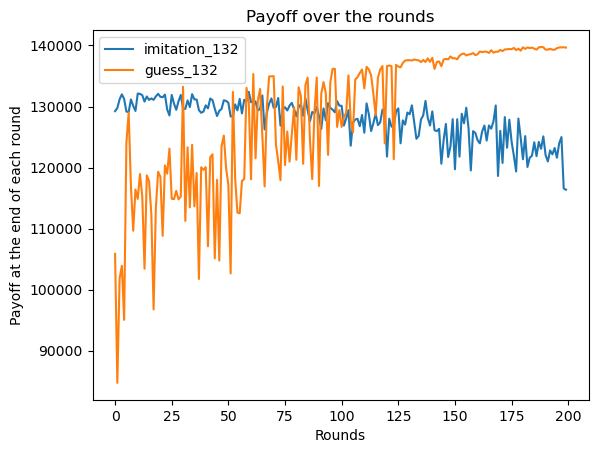

In [9]:
for index, adversary_probability in enumerate(adversary_probabilities):
        if adversary_probability > 0:
            plt.plot(opponent_results[index])
legend = list()
for index, adversary in enumerate(AdversaryModes):
    if adversary_probabilities[index] > 0:
        legend.append(adversary.name)
plt.title("Payoff over the rounds")
plt.xlabel("Rounds")
plt.ylabel("Payoff at the end of each round")
plt.legend(legend)

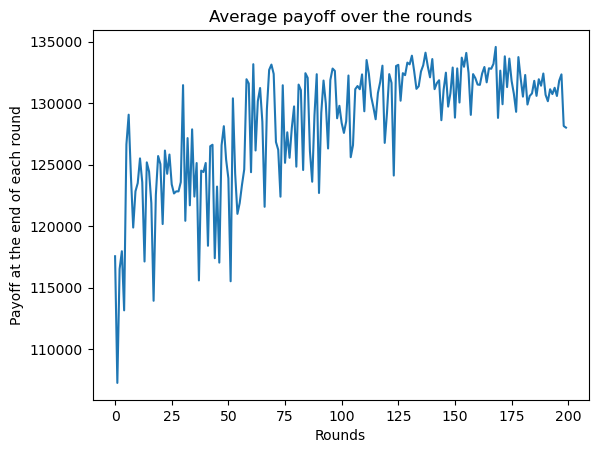

In [20]:
length = len(opponent_results[np.argmax(adversary_probabilities)])
average = [0] * length
for index, adversary_probability in enumerate(adversary_probabilities):
        if adversary_probability > 0:
            average += adversary_probability * np.array(opponent_results[index])
plt.title("Average payoff over the rounds")
plt.xlabel("Rounds")
plt.ylabel("Payoff at the end of each round")
plt.plot(average)

In [10]:
name = ""
for index, adversary in enumerate(AdversaryModes):
    if adversary_probabilities[index] > 0:
        if name != "":
            name += "_"
        name += str(adversary_probabilities[index]) + "_" + adversary.name

In [11]:
excel_name = name + ".xlsx"
writer = pd.ExcelWriter(excel_name, engine='xlsxwriter')
for index, adversary in enumerate(AdversaryModes):
    if adversary_probabilities[index] > 0:
        df = pd.DataFrame(opponent_results[index])
        name = "Payoff against " + adversary.name
        df.to_excel(writer, sheet_name= name, index=False)
writer.save()
Qtable.save(name)

In [12]:
# We now have the trained agent. We want to test it against each opponent individually, so that
# we can compare it against the agent that is just trained against this opponent.

In [13]:
for index, adversary in enumerate(AdversaryModes):
    if adversary_probabilities[index] > 0:
        new_adversary_probabilities =[0]*len(AdversaryModes)
        new_adversary_probabilities[index] = 1
        result = Test(game, Qtable, discount_factor, new_adversary_probabilities)
        payoff, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
        print("Adversary Name:", adversary.name)
        print("Agent Payoff:", payoff, "Adversary Payoff:", adversary_payoff)
        print("Agent Actions:", actions)
        print("Adversary Actions:", adversary_actions)
        print("Agent Demand Potential:", demand_potential)

Adversary Name: imitation_132
Agent Payoff: 116374.0 Adversary Payoff: 66286.0
Agent Actions: [118 132 115 118 107 114 107 104  91  90  99  90  91  87  94  87  92  95
  94  90  91  98 110 122 126]
Adversary Actions: [132 118 132 115 118 107 114 107 104  91  90  99  90  91  87  94  87  92
  95  94  90  91  98 110 122]
Agent Demand Potential: [200. 207. 200. 208. 206. 211. 207. 210. 211. 217. 217. 212. 216. 215.
 217. 213. 216. 213. 211. 211. 213. 212. 208. 202. 196.]
Adversary Name: guess_132
Agent Payoff: 139655.0 Adversary Payoff: 92413.0
Agent Actions: [118 132 132 132 132 132 132 132 132 132 132 132 132 132 128 128 124 123
 123 123 123 124 124 112 135]
Adversary Actions: [132 132 132 132 132 132 132 132 132 132 132 132 132 132 132 124 124 124
 124 124 124 124 124 124 129]
Agent Demand Potential: [200. 207. 207. 207. 207. 207. 207. 207. 207. 207. 207. 207. 207. 207.
 207. 209. 207. 207. 207. 207. 207. 207. 207. 207. 213.]
